In [3]:
import pandas as pd

df = pd.read_csv("07553.csv")
df.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,3.733111,0.002139,12.633286,-0.0006,0.002,0.000
1,3.912614,1.491411,12.586211,1.4995,4.783,2.485
2,3.926494,1.493167,12.495033,1.4995,4.808,8.266
3,3.936090,1.491712,12.448769,1.4995,4.808,14.063
4,3.943972,1.492293,12.294811,1.4995,4.808,19.891


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df["dQ"] = df["Current_measured"] * df["Time"].diff()
df["dV"] = df["Voltage_measured"].diff()
df["dQ/dV"] = df["dQ"] / df["dV"]
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df["Cycle"] = np.linspace(1, len(df), len(df))

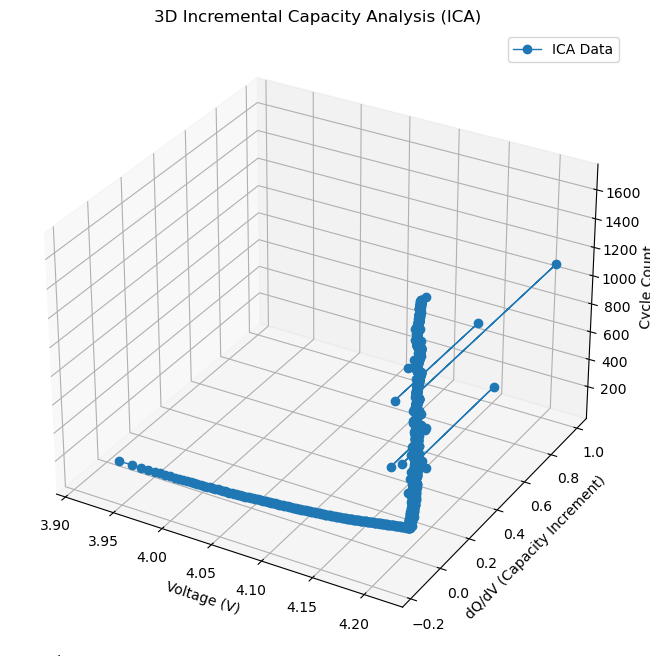

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df["Voltage_measured"], df["dQ/dV"], df["Cycle"], marker='o', linestyle='-', lw=1, label="ICA Data")


ax.set_xlabel("Voltage (V)")
ax.set_ylabel("dQ/dV (Capacity Increment)")
ax.set_zlabel("Cycle Count")
ax.set_title("3D Incremental Capacity Analysis (ICA)")
ax.legend()
plt.show()
